In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
mw_density = (1.15e+12 * 1.989e+30) / (17e+12 * (9.461e+15)**3)
def findDensity(r, theta, n = 1, G = 6.67e-11, rho_0 = (1/3) * mw_density, r_0 = 52850 * 9.461e+15):
    V_0 = np.sqrt(4 * np.pi * G * rho_0 * r_0**2)
    P_theta = (1 + np.cos(theta))**(n + 1) + (1 - np.cos(theta))**(n + 1)
    S_theta = (4 * (n + 1) * np.sin(theta)**(2 * n))/(P_theta)**2
    rDensity = V_0**2 / (4 * np.pi * G * r**2)
    return rDensity * S_theta

def orbitalVel(m, r, G = 6.67e-11):
    return np.sqrt(G * m / r)

In [3]:
N = 100
r_0 = 52850 * 9.461e+15
X = np.linspace(-r_0,r_0,100)
Y = np.linspace(-r_0,r_0,100)
Z = np.linspace(-r_0,r_0,100)
matrix = np.zeros(shape = (N,N,N,3))
DMBodies = np.zeros(shape = (N**3, 6))
DM_index = 0
for i in range(N):
    for j in range(N):
        for k in range(N):
            """ matrix[i,j,k,0] = X[k]
            matrix[i,j,k,1] = Y[j]
            matrix[i,j,k,2] = Z[i] """
            DMBodies[DM_index,0] = np.sqrt(X[k]**2 + Y[j]**2 + Z[i]**2) # calculating the radius in spherical
            DMBodies[DM_index,1] = np.arccos(Z[i]/DMBodies[DM_index,0]) # calculating theta in spherical
            DMBodies[DM_index,2] = np.arcsin(Y[j]/(DMBodies[DM_index,0] * np.sin(DMBodies[DM_index,1])))                 # calculation phi in spherical
            
            vol = (X[1] - X[0]) * (Y[1] - Y[0]) * (Z[1] - Z[0])
            DMBodies[DM_index,3] = findDensity(DMBodies[DM_index,0], DMBodies[DM_index,1]) # Density of DM body
            DMBodies[DM_index,4] = vol                                                  # Volume of DM body
            DMBodies[DM_index,5] = DMBodies[DM_index,3] * DMBodies[DM_index,4]          # Mass of DM body
            DM_index += 1

In [22]:
randomRadii = [random.randint(1,r_0) for i in range(100)]
velocities = []

for i in range(len(randomRadii)):
    attractors = np.where(DMBodies[:,0] < randomRadii[i])[0]
    totalMass = 0
    for j in attractors:
        totalMass += DMBodies[j,5]
    
    velocity = orbitalVel(totalMass, randomRadii[i])
    velocities.append(velocity)

In [23]:
sunPos_attractors = np.where(DMBodies[:,0] < 8.34 * 3.086e+19)[0]
totalMass = 0
for j in sunPos_attractors:
    totalMass += DMBodies[j,5]
    
sunPos_velocity = orbitalVel(totalMass, 8.34 * 3.086e+19)
normFactor = sunPos_velocity / 230

In [24]:
sunPos_velocity / normFactor

230.0

In [26]:
randomRadii = np.array(randomRadii) * 3.24078e-17
velocities = velocities / normFactor

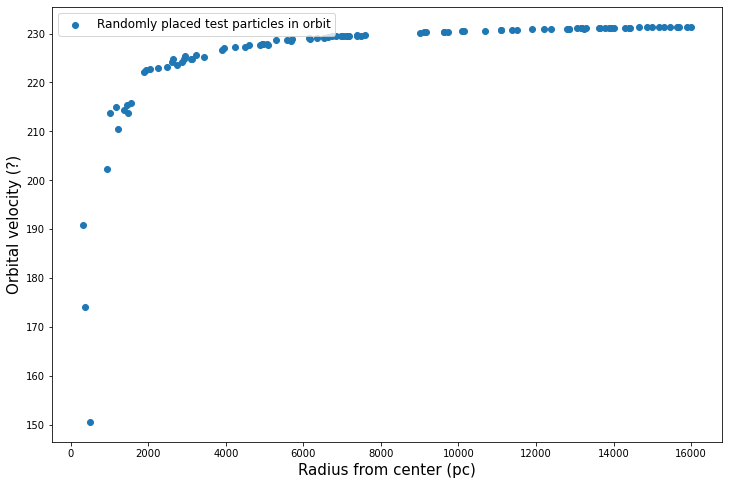

In [8]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)

ax.scatter(randomRadii, velocities, label = 'Randomly placed test particles in orbit')
ax.set_xlabel('Radius from center (pc)', fontsize = 15)
ax.set_ylabel('Orbital velocity (?)', fontsize = 15)
ax.legend(fontsize = 12)
plt.savefig('C://Users/tyler/Documents/Alpha Folder/00-School/00-Lycoming/01-Active Classes/PHYS 448-A/Writing/Final Paper/Figures/model_rot_curve.pdf')
plt.show()

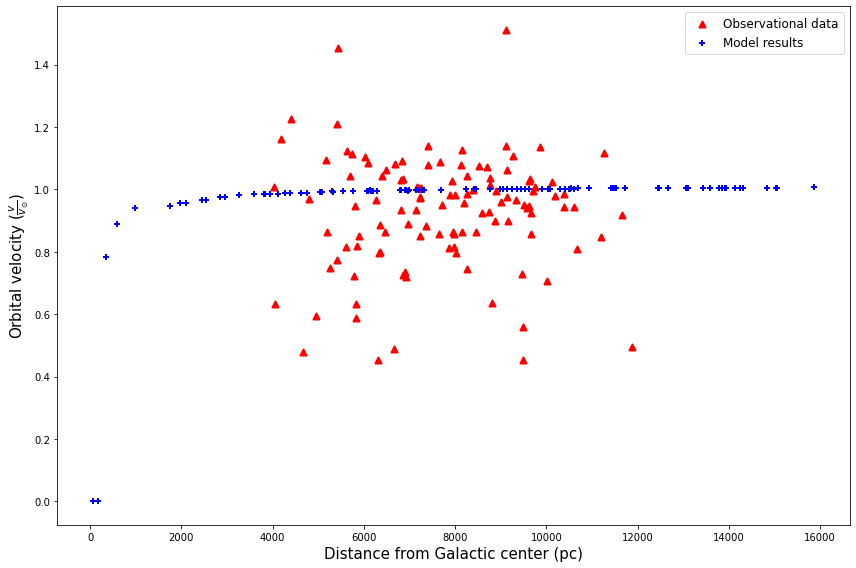

In [29]:
imported_data = pd.read_csv('processed_data.csv')
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)

#ax.scatter(imported_data['radius'], np.array(imported_data['velocity']) /230, color = 'red', label = 'Observational data', marker = '^', linewidth = 2)
ax.scatter(observational_radius, norm_obs_vel, color = 'red', marker = '^', label = 'Observational data', linewidth = 2)
ax.scatter(randomRadii, velocities / 230, color = 'blue', label = 'Model results', marker = '+', linewidth = 2)
ax.set_xlabel('Distance from Galactic center (pc)', fontsize = 15)
ax.set_ylabel(r'Orbital velocity $(\frac{v}{v_{\odot}}$)', fontsize = 15)
ax.legend(fontsize = 12)
plt.tight_layout()
plt.savefig('C://Users/tyler/Documents/Alpha Folder/00-School/00-Lycoming/01-Active Classes/PHYS 448-A/Writing/Final Paper/Figures/full_model_comparison.pdf')
plt.show()

In [10]:
model_velocities = []
for i in imported_data['radius']:

    attractors = np.where(DMBodies[:,0] < i * 3.086e+16)[0]
    totalMass = 0
    for j in attractors:
        totalMass += DMBodies[j,5]
    
    velocity = orbitalVel(totalMass, i * 3.086e+16)
    model_velocities.append(velocity)

In [11]:
observational_radius = np.array(imported_data['radius'])
observational_velocities = np.array(imported_data['velocity'])
model_velocities = model_velocities / normFactor

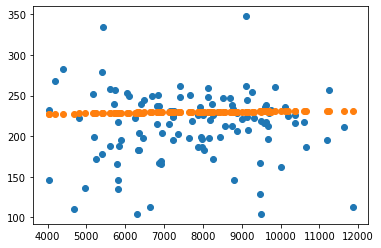

In [12]:
plt.scatter(observational_radius, observational_velocities)
plt.scatter(observational_radius, model_velocities)
plt.show()

In [13]:
norm_obs_vel = observational_velocities / 230
norm_model_vel = model_velocities / 230

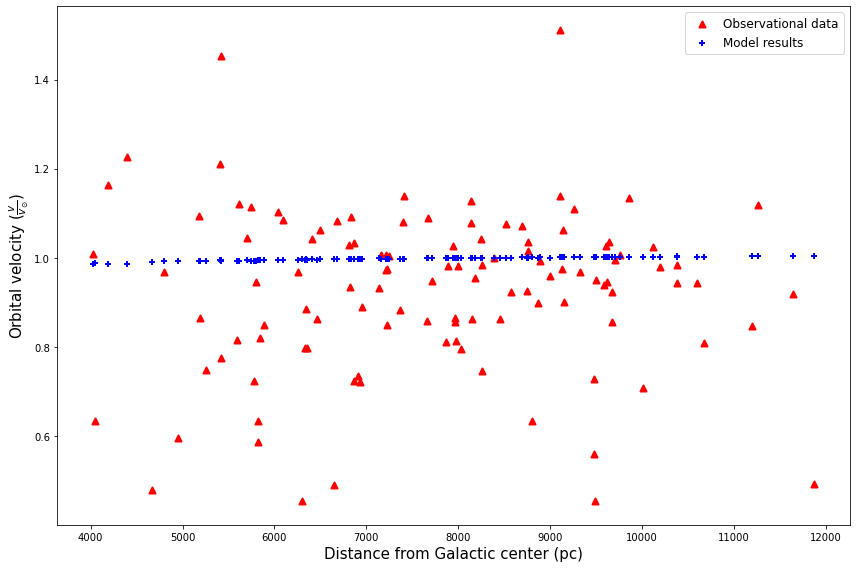

In [19]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)

ax.scatter(observational_radius, norm_obs_vel, color = 'red', marker = '^', label = 'Observational data', linewidth = 2)
ax.scatter(observational_radius, norm_model_vel, color = 'blue', marker = '+', label = 'Model results', linewidth = 2)

ax.set_xlabel('Distance from Galactic center (pc)', fontsize = 15)
ax.set_ylabel(r'Orbital velocity $(\frac{v}{v_{\odot}}$)', fontsize = 15)
ax.legend(fontsize = 12)

plt.tight_layout()
plt.savefig('C://Users/tyler/Documents/Alpha Folder/00-School/00-Lycoming/01-Active Classes/PHYS 448-A/Writing/Final Paper/Figures/comparison.pdf')
plt.show()

In [15]:
chi_sq = 0
for i in range(len(observational_radius)):
    chi_sq += ((norm_obs_vel[i] - norm_model_vel[i])**2)/norm_obs_vel[i]
chi_sq


6.671383793944758